Random Trees Embedding
===

* *0:00 min* | Última modificación: Septiembre 21, 2021 | YouTube

https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html

In [1]:
from sklearn.datasets import load_digits

digits = load_digits(n_class=6, return_X_y=False)
X = digits.data
y = digits.target
n_samples, n_features = X.shape

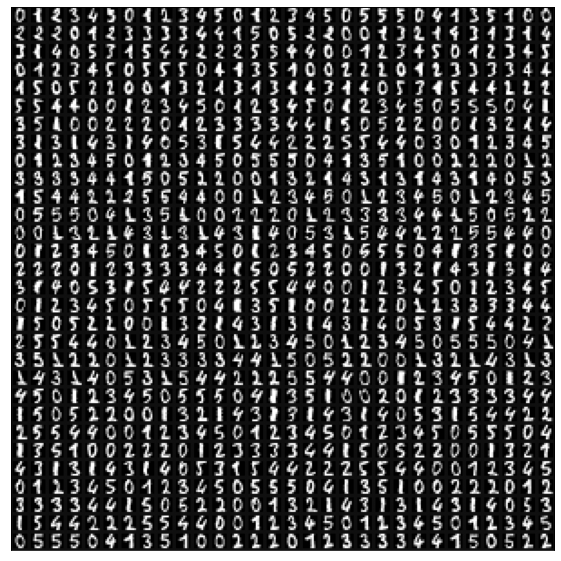

In [2]:
import numpy as np

plt.figure(figsize=(10, 10))
n_img_per_row = 30
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix : ix + 8, iy : iy + 8] = 1 - X[i * n_img_per_row + j].reshape((8, 8))

plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.show()

In [3]:
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomTreesEmbedding

n_neighbors = 30

randomTreesEmbedding = RandomTreesEmbedding(
    n_estimators=200,
    random_state=0,
    max_depth=5,
)

X_projected = randomTreesEmbedding.fit_transform(X)
pca = TruncatedSVD(n_components=2)
X_projected = pca.fit_transform(X_projected)

x_min, x_max = np.min(X_projected, 0), np.max(X_projected, 0)
X_scaled = (X_projected - x_min) / (x_max - x_min)

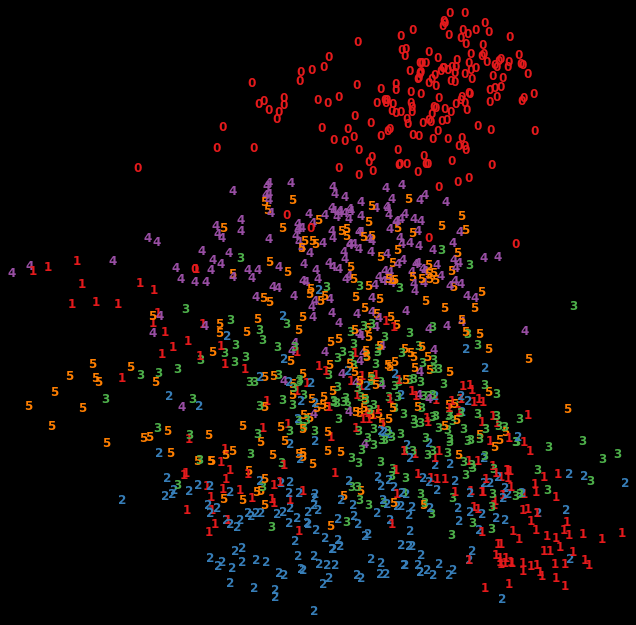

In [8]:
import matplotlib.pyplot as plt
from matplotlib import offsetbox

plt.figure(figsize=(11, 11)).patch.set_facecolor("black")
# plt.style.use("dark_background")

for i in range(X_scaled.shape[0]):

    plt.text(
        X_scaled[i, 0],
        X_scaled[i, 1],
        str(y[i]),
        color=plt.cm.Set1(y[i] / 10.0),
        fontdict={"weight": "bold", "size": 12},
    )

    # shown_images = np.array([[1.0, 1.0]])
    # for i in range(X_scaled.shape[0]):
    #     dist = np.sum((X_scaled[i] - shown_images) ** 2, 1)
    #     if np.min(dist) < 4e-3:
    #         # No grafica puntos que esten muy cercanos
    #         continue

    #     shown_images = np.r_[shown_images, [X_scaled[i]]]

    #     imagebox = offsetbox.AnnotationBbox(
    #         offsetbox.OffsetImage(
    #             digits.images[i],
    #             cmap=plt.cm.gray_r,
    #         ),
    #         X_scaled[i],
    #     )
    #     plt.gca().add_artist(imagebox)


plt.gca().spines["left"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.xticks([])
plt.yticks([])
plt.show()